**MLZoomcamp - Homework2**

In [1]:
#Libraries
import numpy as np
import pandas as pd

In [2]:
#Get data
df = pd.read_csv("/home/jovyan/datasets/housing.csv")

In [3]:
#Initial EDA
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:ylabel='Frequency'>

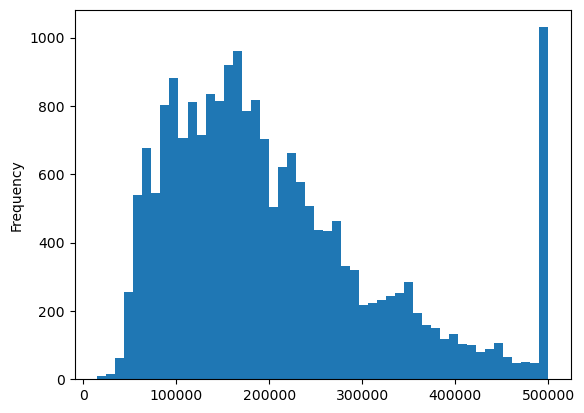

In [4]:
df["median_house_value"].plot(kind="hist", bins=50)

In [5]:
df = df[["latitude", "longitude", "housing_median_age", "total_rooms",
        "total_bedrooms", "population", "households", "median_income", "median_house_value"]]

**Question 1**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
#Number of missing values in total_bedrooms
df["total_bedrooms"].isnull().sum()

207

**Question 2**

In [8]:
df["population"].median()

1166.0

In [9]:
#Set seed
np.random.seed(42)

#Define set sizes
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Shuffle dataset
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [10]:
#Split data into train, validation and test sets
df_train = df_shuffled.iloc[:n_train].copy().reset_index()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy().reset_index()
df_test = df_shuffled.iloc[n_train+n_val:].copy().reset_index()

In [11]:
#Obtain dependent variable and apply log transformation
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

In [12]:
#Remove target variable from dataframe
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

**Question 3**

In [13]:
#Define function to train linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
#define function to calculate RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [37]:
#Fill missing values with zero and train model

#Fill missing values
df_train_zero = df_train.copy()
df_train_zero["total_bedrooms"].fillna(0, inplace=True)

#Train Model
w_0, w = train_linear_regression(df_train_zero, y_train)

#RMSE
df_val_zero = df_val.copy()
df_val_zero["total_bedrooms"].fillna(0, inplace=True)

y_pred = w_0 + df_val_zero.dot(w)
print(round(rmse(y_val, y_pred),2))

0.33


In [38]:
#Fill missing values with mean and train model

#Fill missing values
df_train_mean = df_train.copy()
df_train_mean["total_bedrooms"].fillna(df_train_mean["total_bedrooms"].mean(), inplace=True)

#Train Model
w_0, w = train_linear_regression(df_train_mean, y_train)

#RMSE
df_val_mean = df_val.copy()
df_val_mean["total_bedrooms"].fillna(df_train_mean["total_bedrooms"], inplace=True)

y_pred = w_0 + df_val_mean.dot(w)
print(round(rmse(y_val, y_pred),2))

0.33


**Question 4**

In [39]:
#Define function to train linear regression with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [43]:
#Prepare data
df_train_zero = df_train.copy()
df_train_zero["total_bedrooms"].fillna(0, inplace=True)
df_val_zero = df_val.copy()
df_val_zero["total_bedrooms"].fillna(0, inplace=True)

#RMSE for different regularization parameters
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train_zero, y_train, r=r)      
    y_pred = w_0 + df_val_zero.dot(w)
    print("r:", r, "rmse:", round(rmse(y_val, y_pred),2))


r: 0 rmse: 0.33
r: 1e-06 rmse: 0.33
r: 0.0001 rmse: 0.33
r: 0.001 rmse: 0.33
r: 0.01 rmse: 0.33
r: 0.1 rmse: 0.33
r: 1 rmse: 0.33
r: 5 rmse: 0.34
r: 10 rmse: 0.34


**Question 5**

In [50]:
#Set seed
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(s)

    #Define set sizes
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    #Shuffle dataset
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    #Split data into train, validation and test sets
    df_train = df_shuffled.iloc[:n_train].copy().reset_index()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy().reset_index()
    df_test = df_shuffled.iloc[n_train+n_val:].copy().reset_index()

    #Obtain dependent variable and apply log transformation
    y_train = np.log1p(df_train["median_house_value"].values)
    y_val = np.log1p(df_val["median_house_value"].values)
    y_test = np.log1p(df_test["median_house_value"].values)

    #Remove target variable from dataframe
    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]

    #Fill missing values
    df_train_zero = df_train.copy()
    df_train_zero["total_bedrooms"].fillna(0, inplace=True)

    #Train Model
    w_0, w = train_linear_regression(df_train_zero, y_train)

    #RMSE
    df_val_zero = df_val.copy()
    df_val_zero["total_bedrooms"].fillna(0, inplace=True)

    y_pred = w_0 + df_val_zero.dot(w)
    scores.append(round(rmse(y_val, y_pred),3))
    print("seed:", s, "rmse:", round(rmse(y_val, y_pred),3))

round(np.std(scores),3)


seed: 0 rmse: 0.339
seed: 1 rmse: 0.336
seed: 2 rmse: 0.332
seed: 3 rmse: 0.34
seed: 4 rmse: 0.339
seed: 5 rmse: 0.343
seed: 6 rmse: 0.345
seed: 7 rmse: 0.339
seed: 8 rmse: 0.346
seed: 9 rmse: 0.336


0.004

**Question 6**

In [56]:
np.random.seed(9)

#Define set sizes
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Shuffle dataset
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

#Split data into train, validation and test sets
df_train = df_shuffled.iloc[:n_train].copy().reset_index()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy().reset_index()
df_test = df_shuffled.iloc[n_train+n_val:].copy().reset_index()

#Obtain dependent variable and apply log transformation
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

#Remove target variable from dataframe
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

#Combine train and validation sets
X = pd.concat([df_train, df_val])
X_zero = X.copy()
X_zero["total_bedrooms"].fillna(0, inplace=True)

y_full = np.concatenate((y_train, y_val))

#Train regression with combined sets
w_0, w = train_linear_regression_reg(X_zero, y_full, r=0.001)

#RMSE
df_test_zero = df_test.copy()
df_test_zero["total_bedrooms"].fillna(0, inplace=True)

y_pred = w_0 + df_test_zero.dot(w)

print(rmse(y_test, y_pred))


0.3453346091765887
